<a href="https://colab.research.google.com/github/danyentezari/bn-ocr/blob/main/BN_Image_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.io import wavfile
from PIL import Image
from scipy import ndimage

import imageio

In [3]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)

In [4]:
# open method used to open different extension image file
im = Image.open(r"./sample.png") 
  
# This method will show image in any image viewer 
im.show() 

In [5]:
im = imageio.imread('./sample.png')
print(im.shape)

(488, 1750, 4)


Text(0, 0.5, 'Pixel count')

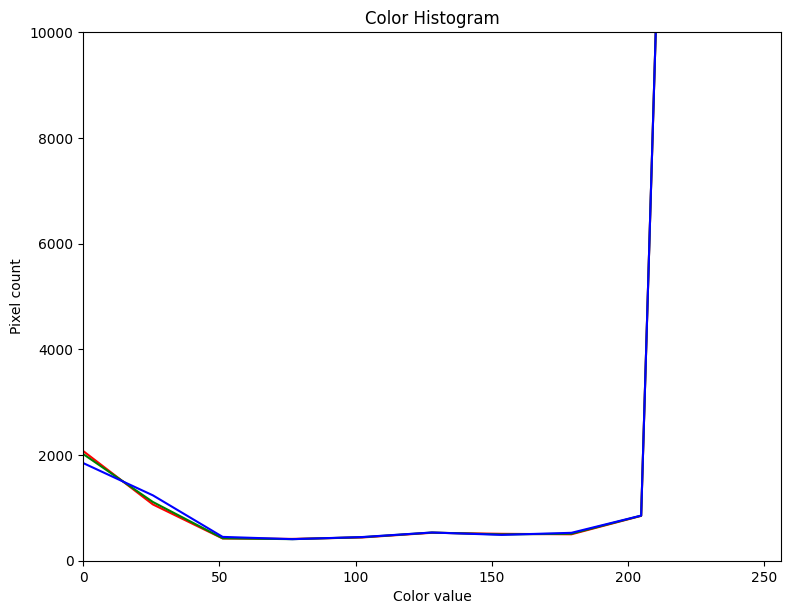

In [6]:
im = imageio.imread('./word.png')

# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
plt.ylim([0, 10000])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        im[:, :, channel_id], bins=10, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")


Text(0, 0.5, 'Pixel count')

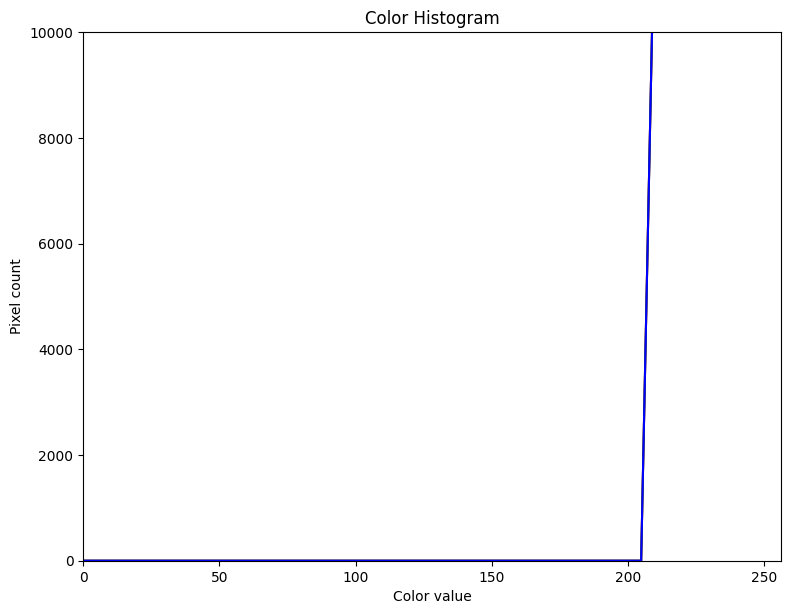

In [7]:
im = imageio.imread('./space.png')

# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
plt.ylim([0, 10000])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        im[:, :, channel_id], bins=10, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")


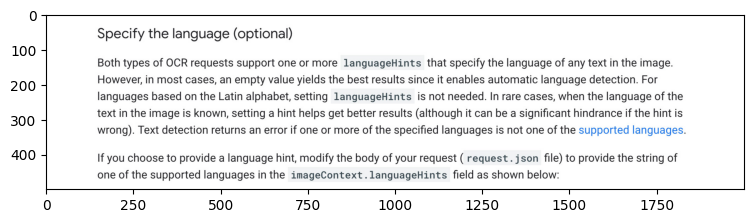

In [8]:
sample = imageio.imread('./sample-resized.jpg')
sample.shape
plt.imshow(sample)

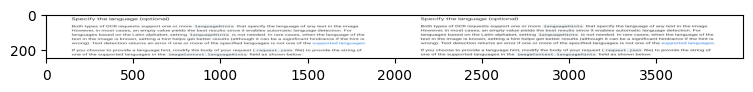

In [9]:
sample = sample.reshape(250, 4000, 3)
plt.imshow(sample)

In [10]:
# for column in sample[10000][:10]:a
#   print(column)

In [11]:
from PIL import Image, ImageFilter
  
  
# Opening the image (R prefixed to string
# in order to deal with '\' in paths)
image = Image.open(r"./sample.png")
  
# Converting the image to grayscale, as edge detection 
# requires input image to be of mode = Grayscale (L)
image = image.convert("L")
  
# Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
image = image.filter(ImageFilter.FIND_EDGES)
  
# Saving the Image Under the name Edge_Sample.png
image.save(r"./sEdge_sample.png")

### Edge Detection

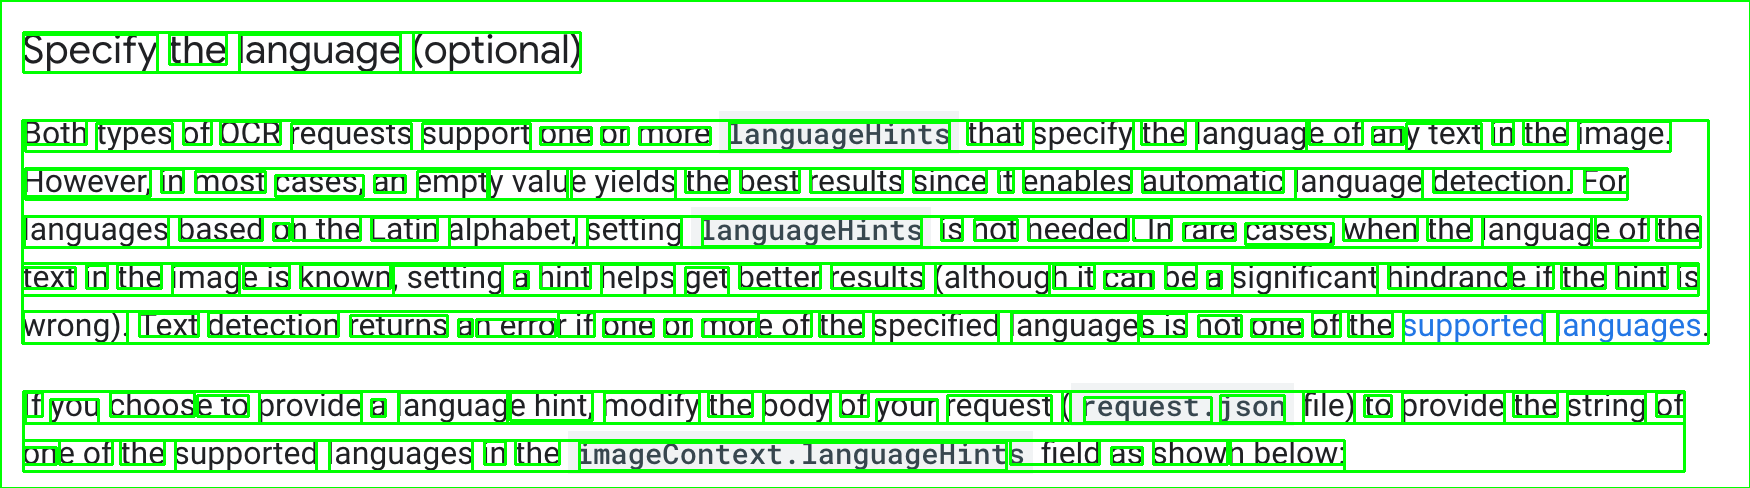

In [12]:
# Reference:
# https://stackoverflow.com/questions/20831612/getting-the-bounding-box-of-the-recognized-words-using-python-tesseract
# https://medium.com/geekculture/tesseract-ocr-understanding-the-contents-of-documents-beyond-their-text-a98704b7c655
import pytesseract
from pytesseract import Output
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('./sample.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)

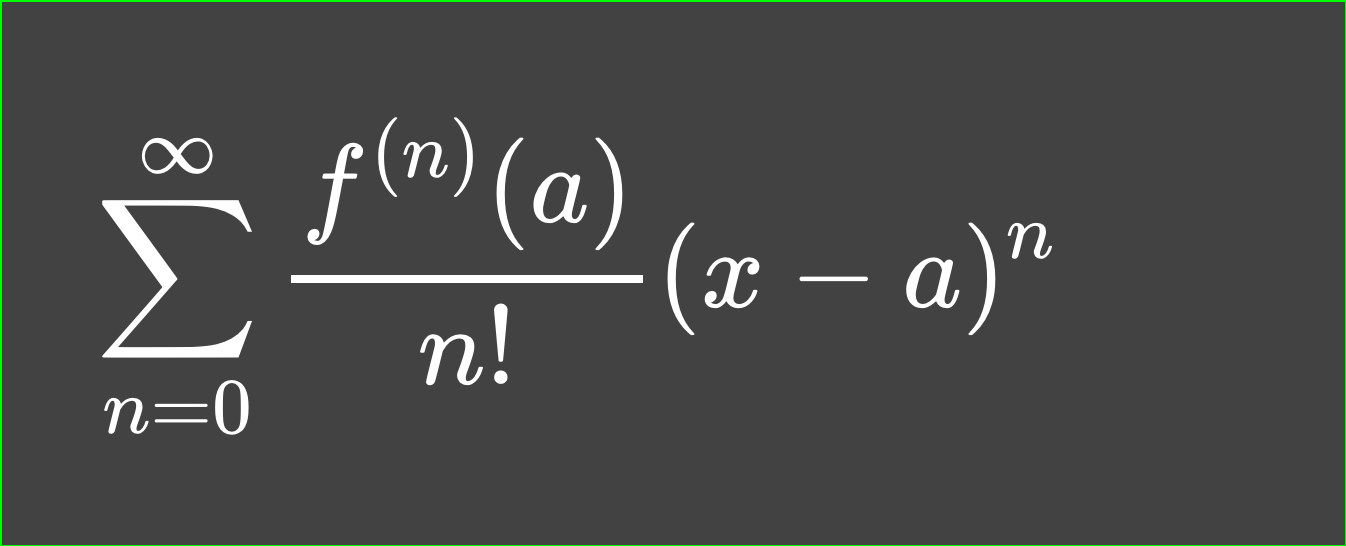

In [13]:
img = cv2.imread('./sample-math.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)

Notes:
- Introduce the ML model the alphabet of english and special characters.
- Use significance testing to detect math symbols

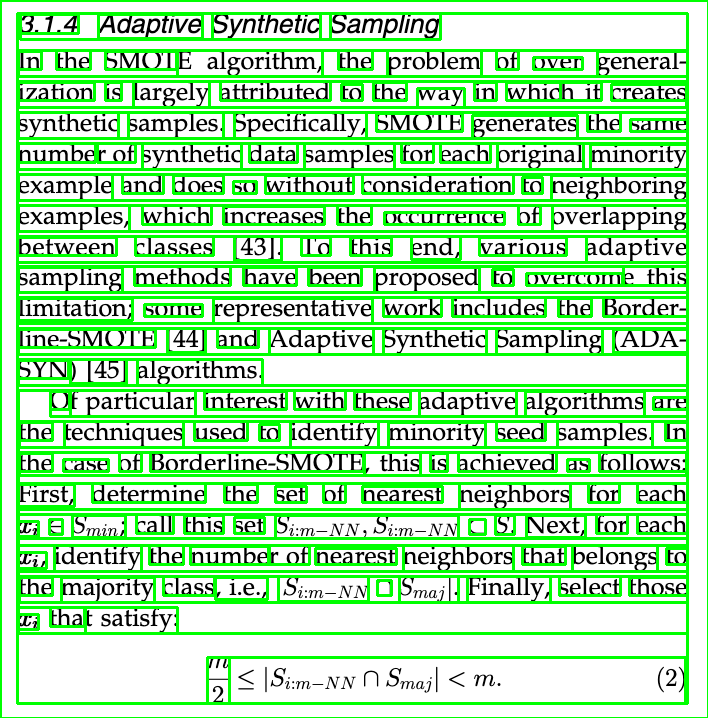

In [14]:
img = cv2.imread('./sample-mix.png')
snippets = []

# d = pytesseract.image_to_data(img, output_type=Output.DICT)
d = pytesseract.image_to_data(img, output_type='data.frame', config=r'--psm 6')
# n_boxes = len(d['level'])
n_boxes = len(d[d['level'] >= 4])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    snippets.append(
        {'dims': (x, y, x+w, y+h), 'level': d['level'][i]}
      )
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)

In [15]:
print(n_boxes)
print(len(snippets))
print((x, y, x+w, y+h))

186
186
(207, 657, 229, 703)


In [16]:
# #snippet = img[y:y+h, x:x+w]
# cv2_imshow(snippet)

In [17]:
# (x, y, x2, y2) = snippets[120]
# snippet = img[y:y2, x:x2]
# cv2_imshow(snippet)

snippet 3


snippet 9


snippet 19


snippet 31


snippet 39


snippet 49


snippet 58


snippet 66


snippet 75


snippet 84


snippet 92


snippet 100


snippet 105


snippet 114


snippet 124


snippet 134


snippet 144


snippet 157


snippet 168


snippet 179


snippet 184


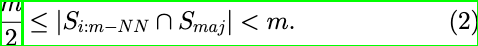

In [18]:
for i, snippet in enumerate(snippets):#snippets[len(snippets)-50: len(snippets)-1]:
  if(snippet['level'] == 4):
    (x, y, x2, y2) = snippet['dims'] #snippets[len(snippets)-63]
    snippet = img[y:y2, x:x2]
    print(f'snippet {i}')
    cv2_imshow(snippet)

In [19]:
# (x, y, x2, y2) = snippets[len(snippets)-4]
# snippet = img[y:y2, x:x2]
# cv2_imshow(snippet)

In [20]:
# d[d['level'] >= 4].tail(30)

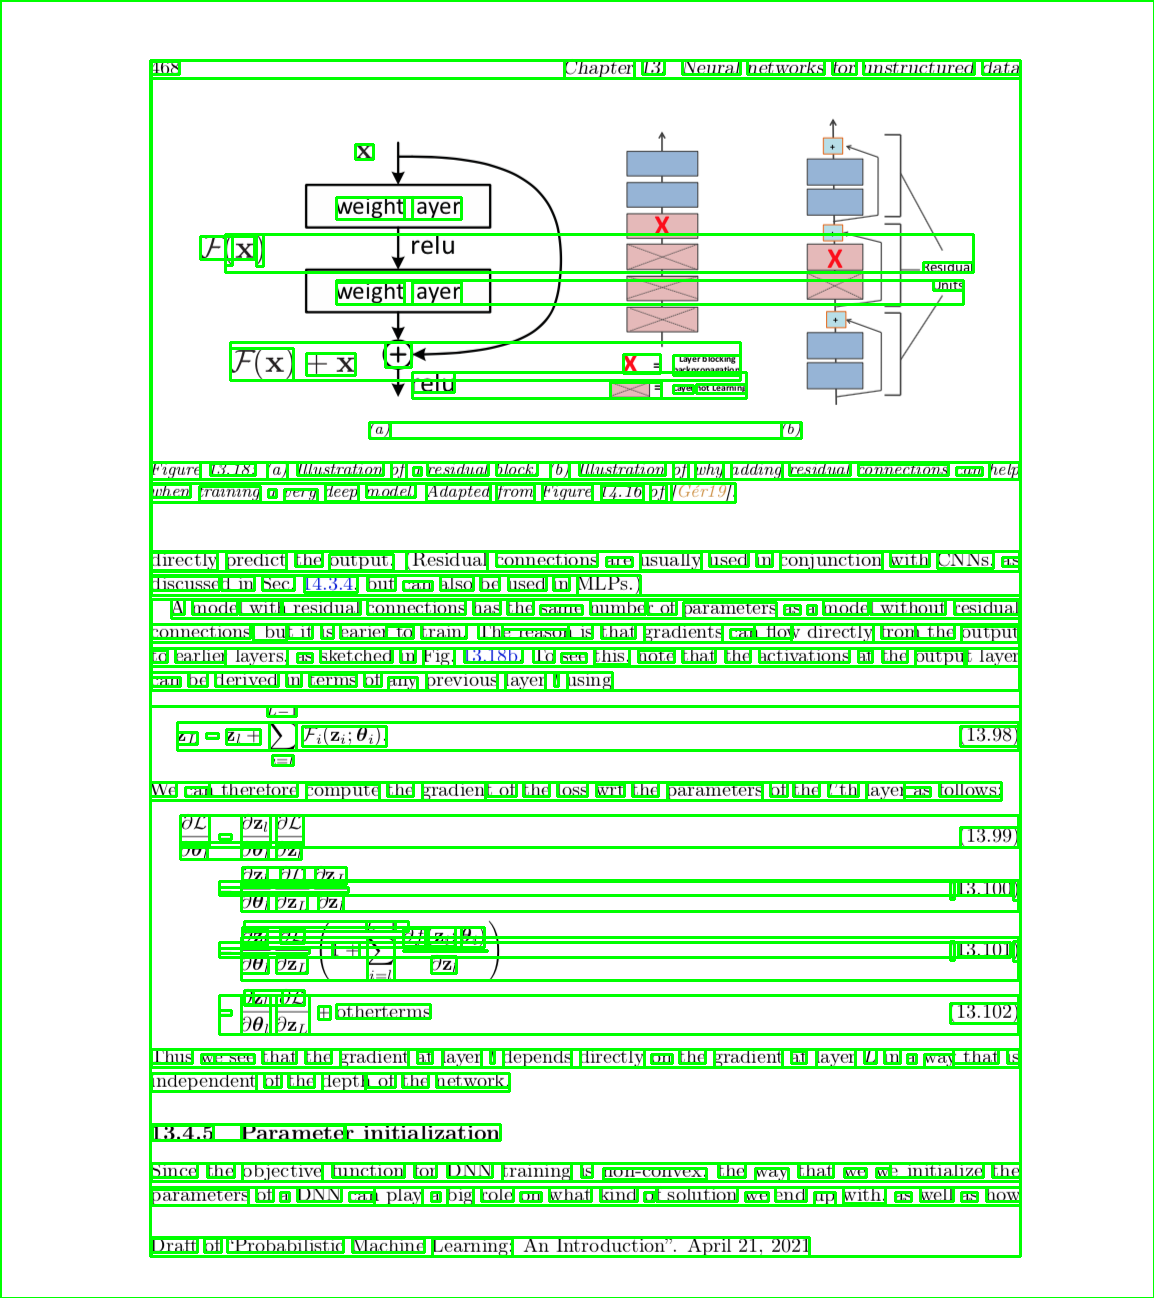

In [21]:
img = cv2.imread('./fullpage.png')
snippets = []

# d = pytesseract.image_to_data(img, output_type=Output.DICT)
d = pytesseract.image_to_data(img, output_type='data.frame', config=r'--psm 6')
# n_boxes = len(d['level'])
n_boxes = len(d[d['level'] >= 4])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    snippets.append(
        {'dims': (x, y, x+w, y+h), 'level': d['level'][i]}
      )
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)

snippet 3


snippet 12


snippet 14


snippet 17


snippet 19


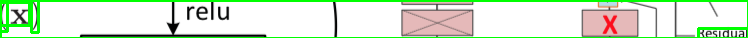

snippet 23


snippet 27


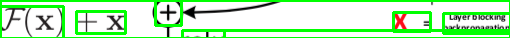

snippet 33


snippet 38


snippet 41


snippet 59


snippet 72


snippet 87


snippet 100


snippet 117


snippet 136


snippet 156


snippet 169


snippet 171


snippet 179


snippet 181


snippet 200


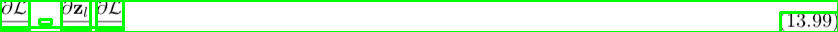

snippet 206


snippet 210


snippet 214


snippet 217


snippet 223


snippet 228


snippet 234


snippet 239


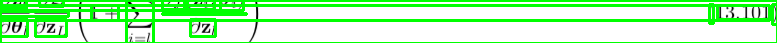

snippet 246


snippet 249


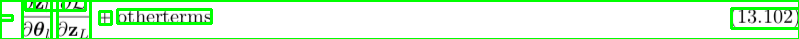

snippet 256


snippet 279


snippet 287


snippet 291


snippet 308


snippet 331


In [22]:
for i, snippet in enumerate(snippets):#snippets[len(snippets)-50: len(snippets)-1]:
  if(snippet['level'] == 4):
    (x, y, x2, y2) = snippet['dims'] #snippets[len(snippets)-63]
    snippet = img[y:y2, x:x2]
    print(f'snippet {i}')
    cv2_imshow(snippet)

### other snippets

In [23]:
# Text height
# reference: 
# https://stackoverflow.com/questions/12833586/finding-line-height-and-baseline-from-tesseract-output
#
# Tesseract.getUtf8Text().getBoxRects()


# https://stackoverflow.com/questions/55406993/how-to-get-confidence-of-each-line-using-pytesseract

### Shear Detection (for detecting italic)

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import re
import string
from PIL import Image

import keras
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
def center_pad_image(img, canvas_h=300, canvas_w=300):

  canvas = np.zeros((canvas_h, canvas_w, 1)) #create_canvas(canvas_h, canvas_w)
  # Image positions
  img2_width = img.shape[1]
  img2_height = img.shape[0]
  black_row = np.array([[0 for x in range(0,img2_width)]])
  img2 = np.dstack((black_row,black_row,black_row))


  startx = int((canvas_w-img2_width)/2)
  starty = int((canvas_h-img2_height)/2)
  endx = startx + img2_width
  endy = starty + img2_height

  # Superimpose image
  to_superimpose = img #Image.fromarray(np.uint8(img)).convert('RGB')
  # Reset global canvas
  canvas[:, :] = 0
  canvas[starty:endy, startx:endx] = to_superimpose


  return canvas

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


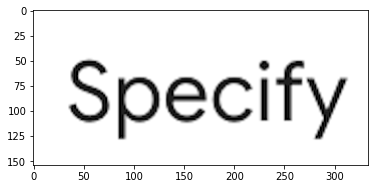

In [26]:
def loadImage(filepath):
  # img = load_img(filepath, target_size=(ch, cw), grayscale=True)
  img = load_img(filepath, grayscale=True)
  img = img_to_array(img)
  #img = img.reshape(1, 42, 42, 3)
  #img = img.reshape(32, 125, 3)
  img = img.astype('float32')
  # img = img / 255.0
  return img

plt.imshow(loadImage('./word.png')[:,:,0], cmap='gray')

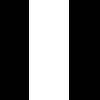

In [27]:
M_2 = []
M_r = [0 for a in range(0,100)]

for i in range(0, 100):
    M_2.append(M_r)
M_2 = np.array(M_2)

for i, r in enumerate(M_2):
  M_2[i][29:69] = 255

t = np.identity(100)


M_2 = np.matmul(M_2, t)

Image.fromarray(np.uint8(M_2)).convert('RGB')

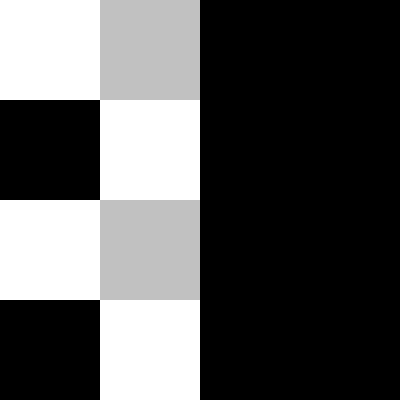

In [28]:
from scipy.ndimage import convolve


M_2 = []
M_r = [0 for a in range(0,100)]

for i in range(0, 100):
    M_2.append(M_r)
M_2 = np.array(M_2)

for i, r in enumerate(M_2):
  M_2[i][29:69] = 255

M_a = np.array([
    [255, 0],
    [255, 0]
])

t = np.array([
    [1, -0.25],
    [0, 1]
])


#transformed = convolve(M_2, t)
t =  np.kron(t, np.ones(10000).reshape(100, 100))
# transformed = np.matmul( M_2, t )

transformed = np.kron(M_a, t)

Image.fromarray(np.uint8(transformed)).convert('RGB')

In [50]:
def lena():
    import pickle, os
    f = open( './lena.dat' ,'rb')
    lena = array(pickle.load(f))
    f.close()
    return lena

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead


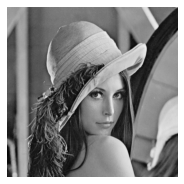

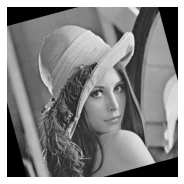

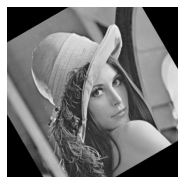

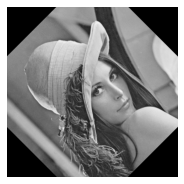

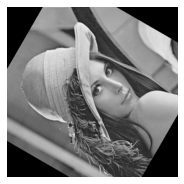

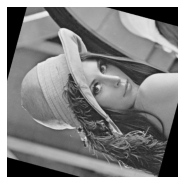

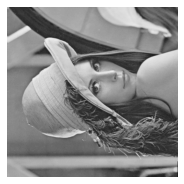

In [55]:
# Reference:
# https://stackoverflow.com/questions/20161175/how-can-i-use-scipy-ndimage-interpolation-affine-transform-to-rotate-an-image-ab

import scipy
# import scipy.misc
# lena = scipy.misc.lena()
from scipy import array
from math import pi,cos,sin

#src = Image.fromarray(np.uint8(transformed)) #.convert('RGB')

src = lena()
c_in=0.5*array(src.shape)
c_out=array((256.0,256.0))
for i in range(0,7):
    a=i*15.0*pi/180.0
    transform = array(
        [
            [cos(a),-sin(a)],
            [sin(a),cos(a)]
        ]
    )

    offset = c_in-c_out.dot(transform)

    dst = scipy.ndimage.interpolation.affine_transform(
        src,transform.T,order=2,offset=offset,output_shape=(512,512),cval=0.0,output=np.float32
    )

    plt.figure(figsize=(25, 25))
    plt.subplot(1,7,i+1);
    plt.axis('off');
    plt.imshow(dst,cmap=plt.cm.gray)

plt.show()